In [149]:
print ('Bismillah Hir Rehman Nir Rahim')

Bismillah Hir Rehman Nir Rahim


# **Importing Libraries**

In [162]:
import matplotlib.pyplot as plt
import heapq
import numpy as np
import pandas as pd
from queue import PriorityQueue

import time
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
from random import random
from random import randint

# **Generate Random Graph on the basis of Vertices & Edges**

In [163]:
def ER(n, p):
    V = set([v for v in range(n)])
    E = set()
    for combination in combinations(V, 2):
        a = random()
        if a < p:
            E.add(combination)
    g = nx.Graph()
    matrix=np.array([[0]*n]*n)
    for i in E:
      val=randint(0, 9)
      matrix[i[0],i[1]]=val
      matrix[i[1],i[0]]=val
    for i in range(n):
      for j in range(n):
        if i!=j:
          if matrix[i][j]==0:
            matrix[i][j]=INF
    g.add_nodes_from(V)
    g.add_edges_from(E)
    return matrix,list(V),list(E)

#pos = nx.spring_layout(graph)
#nx.draw_networkx(graph, pos)
#plt.title("Random Graph Generation Example")
#plt.show()

# **Initials**

In [164]:
def initialize_values():
  # Defining a positive infinite integer
  INF = 99999

  #Edges & Vertices
  V_vertices = len(V_)
  E_edges = len(E_)

  #graph = [[0, 3, INF, 7],
  #         [8, 0, 2, INF],
  #         [5, INF, 0,   1],
  #         [2, INF, INF, 0]
  #         ]

  # WEIGHT MATRIX: L
  """L: the matrix containing the edge weights, where L[u, v] is the weight of edge (u, v). If the edge (u, v) does not exist, then L[u, v] = ∞;"""
  weight_matrix = list(map(lambda i: list(map(lambda j: j, i)), graph))

  # DISTANCE MATRIX: D
  """D: the distance matrix, where D[u, v] is the distance from the vertex u to v. Initially, D[u, v] = ∞ for all vertex pairs;"""
  distance_matrix = [[0 if i==j else INF for j in range(V_vertices) ] for i in range(V_vertices)]

  # Flag for vertices
  """flag: the vector to indicate whether the shortest paths from a vertex to other vertices have been calculated. All
  elements of the vector are set to zero initially. After the shortest paths for vertex u are calculated, flag[u] is set
  to 1."""
  flag = {}

  # The vertives/nodes we have
  vertices_names = [str(i) for i in range(V_vertices)]

  #Min priority Queue
  min_queue = []
  
  # Dataframes for edge weight & distance matrices
  df_L = pd.DataFrame(weight_matrix,index = [str(i) for i in range(V_vertices)],columns=[str(i) for i in range(V_vertices)])
  df_D = pd.DataFrame(distance_matrix,columns=[str(i) for i in range(V_vertices)])



---



---


# **Procedure 1: Modified Dijkstra’s Procedure**

In [165]:
def mod_dijkstra(V,E,source):
  s = source
  df_D.at[int(s), s] = 0              # D[s, s] = 0
  heapq.heappush(min_queue, (df_D.at[int(s), s], s))            # Q = {s}

  while len(min_queue) != 0:
    key,t = heapq.heappop(min_queue)    # t=DeQueue(Q)
    t = str(t)
    if flag[t] == 1:
      print(" HELO YAAR KAISAY HO ")
      for v in V:
        if (df_D.at[int(s), t] + df_D.at[int(t), v]  < df_D.at[int(s), v]):    #D[s, t] + D[t, v] < D[s, v]
          df_D.at[int(s), v] = df_D.at[int(s), t] + df_D.at[int(t), v]        #D[s, v]=D[s, t] + D[t, v]
    else:
      # find t adjacent nodes
      t_row = df_L.loc[t]
      v_array = []
      index = 0
      for v in V:
        if (t_row[index] != INF and t != v):
          v_array.append(df_L.columns[index])
        index+=1 

      for v in v_array:              #each edge (t, v) outgoing from t do     
        if (df_D.at[int(s), t] + df_L.loc[t, v] < df_D.at[int(s), v]):     #D[s, t] + L[t, v] < D[s, v]
          df_D.at[int(s), v] = df_D.at[int(s), t] + df_L.loc[t, v]         #D[s, v] = D[s, t] + L[t, v]
          # Push value in min priority queue
          heapq.heappush(min_queue, (df_D.at[int(s), v], v))  # Enqueue(Q,v)

  flag[s] = 1

# **Algorithm 3: Adaptive Algorithm for the APSP Problem**

In [166]:
def timeCalculate():
  start = time.time()
  #print("Start time: ", start)

  for v in vertices_names:
    flag[v] = 0
  neighbours=[]
  degree=[]
  distances_arr=np.array(df_L)
  unacceptable=[0,INF]

  ordered_vertices=[]
  for v in vertices_names:
      distances=distances_arr[int(v)]
      neighbours.append(np.setdiff1d(distances,unacceptable).shape[0])
  order=(np.arange(0,len(neighbours)))
  zipped_lists = zip(neighbours,order)
  temp_arr=sorted(zipped_lists,reverse=True)
  modified_order=[]

  for i in temp_arr:
    modified_order.append(i[1])

  for i in modified_order:
    mod_dijkstra(vertices_names,E_edges,str(vertices_names[i]))
  #print("End time in seconds ---" , time.time() - start)
  return time.time() - start

In [176]:
inputs = [10, 30, 50, 70, 90, 120,150]
output_time_modDijkstra = []
for i in inputs:
  p = 0.4
  graph,V_,E_ = ER(i, p)
  initialize_values()
  output_time_modDijkstra.append(timeCalculate())


# **Graph of Modified Proposed Dijkstra Algorithm**

Text(0.5, 1.0, 'Modified Dijkstra Algo')

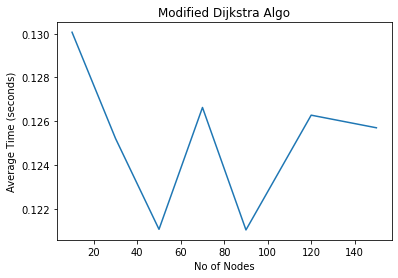

In [177]:
plt.plot(inputs, output_time_modDijkstra)

# Set the x axis label of the current axis.
plt.xlabel('No of Nodes')
# Set the y axis label of the current axis.
plt.ylabel('Average Time (seconds)')
# Set a title 
plt.title('Modified Dijkstra Algo')

In [168]:
print(output_time_modDijkstra)

[0.12166810035705566, 0.12336087226867676, 0.12163567543029785, 0.13036251068115234, 0.1312403678894043, 0.12492156028747559, 0.12446236610412598]


# **Floyd Warshall Algorithm**

In [169]:
def floydWarshall(graph,V):
    start = time.time()
    dist = list(map(lambda i: list(map(lambda j: j, i)), graph))
    for k in range(V):
        # pick all vertices as source one by one
        for i in range(V):
            # Pick all vertices as destination for the
            # above picked source
            for j in range(V):
                # If vertex k is on the shortest path from
                # i to j, then update the value of dist[i][j]
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])
    return time.time() - start        

In [174]:
output_time_floyd = []
for i in inputs:
  p = 0.4
  graph,V_,E_ = ER(i, p)
  output_time_floyd.append(floydWarshall(graph,len(V_)))


# **Floyd-Warshal All Pair Shortest Path Graph**

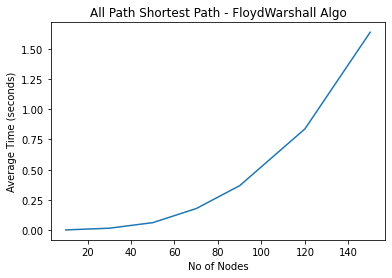

In [175]:
plt.plot(inputs, output_time_floyd)

# Set the x axis label of the current axis.
plt.xlabel('No of Nodes')
# Set the y axis label of the current axis.
plt.ylabel('Average Time (seconds)')
# Set a title 
plt.title('All Path Shortest Path - FloydWarshall Algo')

plt.show()

In [171]:
output_time_floyd

[0.0014598369598388672,
 0.013007402420043945,
 0.0591123104095459,
 0.16204190254211426,
 0.3498842716217041,
 0.8571276664733887,
 1.6884324550628662]

# **Comparison of both algorithms**
# **1. Modified Dijkstra Algo**
# 2**. All Path Shortest Path - FloydWarshall Algo**

[0.12166810035705566, 0.12336087226867676, 0.12163567543029785, 0.13036251068115234, 0.1312403678894043, 0.12492156028747559, 0.12446236610412598]


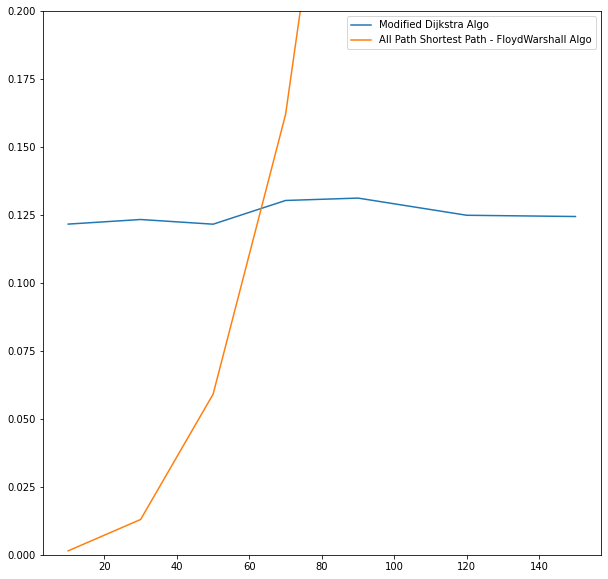

In [173]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.ylim([0, 0.2])
plt.plot(inputs, output_time_modDijkstra)
plt.plot(inputs, output_time_floyd)
plt.legend(["Modified Dijkstra Algo", "All Path Shortest Path - FloydWarshall Algo"])